## Analysis of Irish Dairy Product Production and Consumption in comparison to EU Member States, regarding the rise of non-dairy product Production and Consumption in particular

This analysis aims to analyse the production and consumption of dairy products within Ireland and the impact of increasingly popular alternatives on the population's impression of dairy products. This analysis will be performed through the comparison of Ireland's situation with an EU member state with a similarly sized dairy market and output. 

Sentiment analysis will be performed to explore the apparent increase in public interest in non-dairy alternatives in recent years, and its impact on dairy product sales and consumption.

Additionally, forecasting will be performed to best characterise the future behaviour of the investigated trends, such as the downturn in the consumption of dairy milk.

## Import Required Libraries

In [2]:
#Commonly used libraries for plotting, statistical analysis and data analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from scipy.stats import poisson

#SKLearn is a widely used machine learning library that offers a host of abilities.
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (GridSearchCV, cross_val_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Notes on Licensing of Data

## Data Sourced from FAO

"FAO encourages you to use FAO databases for research, statistical, and scientific purposes. You may access, download, create copies and re-disseminate datasets subject to these Dataset terms.

Unless specifically stated otherwise, all datasets disseminated through the databases below are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO) explained here with the additional terms listed below"-https://www.fao.org/contact-us/terms/db-terms-of-use/en/+

## Notes on Metadata

## Main Sources of Error
Overall Accuracy

"It is not possible to assess the overall accuracy but as there is a substantial amount of estimated or imputed data points, the accuracy for certain products, countries and regions is not good" - https://www.fao.org/faostat/en/#data/FBSH

Sampling Error

"No information available. In the EU the coefficient of variation shall according to regulations not exceed 3% for the area of cultivation for main crops. For non EU countries the coefficient of variation might be significantly larger. For further information see country metadata when available."

Non-sampling error

"No information available of the magnitude on non-sampling errors. One such category of errors is measurement errors which are due mainly to lack of harmonisation in statistical methods. For instance, when FAO concepts do not fit with national concepts, there may be significant measurement errors."


## General Notes

## Use of yearly data vs monthly data

Monthly data offers more data points, providing increased resolution however more noise also exists. 

## Preliminary inspection of available datasets

Relevant datasets available from reputable sources are initially explored and evaluated to determine suitable data for this analysis. Given the nature of the topic, there is limited geographical comparability due to differences in methods and coverage, except for regions with homogenous countries. Due to this convention, analysis and comparison of industries of EU member states is simpler and one is less likely to mis-interpret available data and reportings by a state.

## Notes on FAO Data

## Definition of Statistical Measures used in Datasets

"Areas refer to the area under cultivation. Area under cultivation means the area that corresponds to the total sown area, but after the harvest it excludes ruined areas (e.g. due to natural disasters). If the same land parcel is used twice in the same year, the area of this parcel can be counted twice. Production means the harvested production. Harvested production means production including on-holding losses and wastage, quantities consumed directly on the farm and marketed quantities, indicated in units of basic product weight. Yield means the harvested production per ha for the area under cultivation"- https://www.fao.org/faostat/en/#data/QCL

Unit of measure <br>

"LIVESTOCK PRIMARY: Laying [1000 heads], milk animals [heads], prod Population [No], prod Population [heads], producing Animals/Slaughtered [1000 heads], producing Animals/Slaughtered [heads], production [1000 heads], production [1000], production [heads], production [t], yield [100 mg/head], yield [No/head], yield [hg/head], yield/Carcass Weight [0.1 g/head], yield/Carcass Weight [hg/head]. 5) LIVESTOCK PROCESSED: Production is expressed in tonnes [t] "-https://www.fao.org/faostat/en/#data/QCL

Production quantity to be the metric of interest as a reflection of the demand?? All items explicitly identified as being produced from dairy milk were captured in the dataset. All those without explicit identification could not be verified and so were omitted to avoid the use of incorrect data.

A dataset containing all items relating to milk of any animal source is inspected. An inspection is performed to identify all items relating to cows milk given that it is the predominant dairy product in Ireland.

## Datasets

Production of dairy products within ireland between 1961 and 2018

selling prices of milk from 2000 onwards for all of EU https://ec.europa.eu/eurostat/databrowser/view/APRI_AP_ANOUTA__custom_4481134/default/table?lang=en 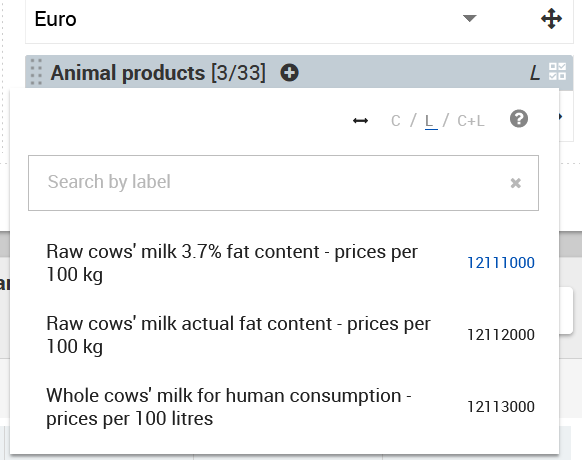

selling prices of milk from 1969-2005 for all of EU https://ec.europa.eu/eurostat/databrowser/view/APRI_AP_HAOUTA__custom_4481289/default/table?lang=en 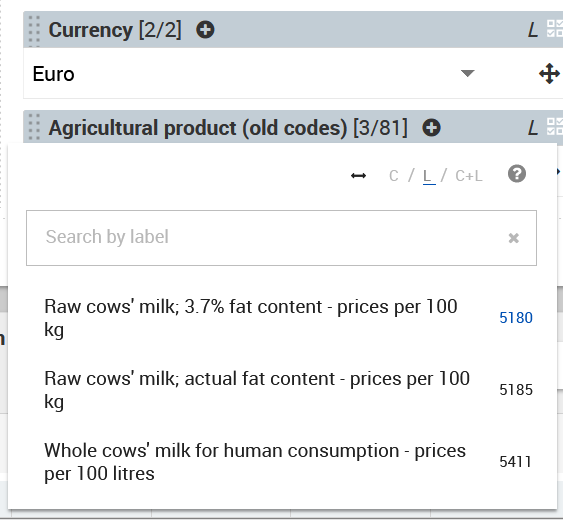

greenhouse gas emissions for all of eu https://ec.europa.eu/eurostat/databrowser/view/ENV_AIR_GGE__custom_4428283/default/table?lang=en. 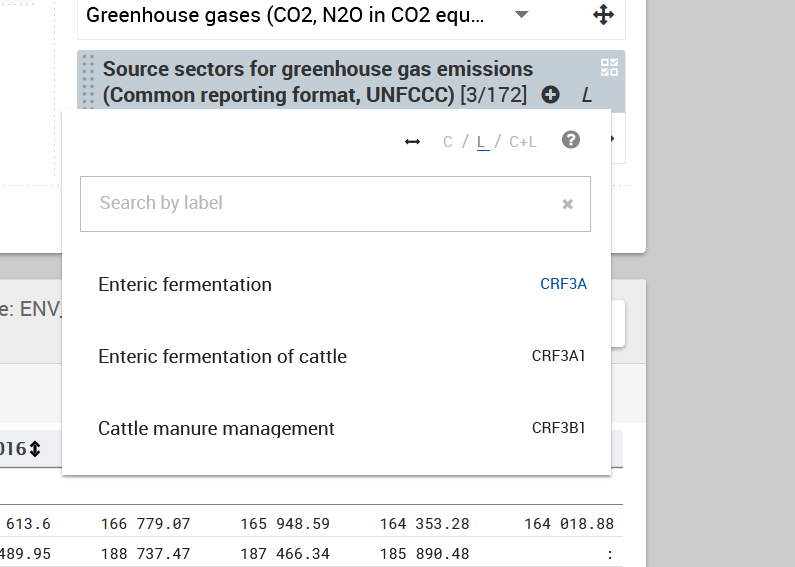

In [3]:
#Inspect a dataset sourced from the Food and Agriculature Organisation of the United Nations
df=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X FAOSTAT Production and Yield of Dairy Products in Ireland 62-21.csv")

print(df.shape)
print(df.head)

(724, 14)
<bound method NDFrame.head of     Domain Code                        Domain  Area Code (M49)     Area  \
0           QCL  Crops and livestock products              372  Ireland   
1           QCL  Crops and livestock products              372  Ireland   
2           QCL  Crops and livestock products              372  Ireland   
3           QCL  Crops and livestock products              372  Ireland   
4           QCL  Crops and livestock products              372  Ireland   
..          ...                           ...              ...      ...   
719         QCL  Crops and livestock products              372  Ireland   
720         QCL  Crops and livestock products              372  Ireland   
721         QCL  Crops and livestock products              372  Ireland   
722         QCL  Crops and livestock products              372  Ireland   
723         QCL  Crops and livestock products              372  Ireland   

     Element Code     Element  Item Code (CPC)             

In [4]:
print(df.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')


Right away we can inspect the columns within the dataset and attempt to identify which columns will be useful and which can be removed to optimise the processing of the dataset.

['Butter of cow milk' 'Buttermilk, dry' 'Cheese from skimmed cow milk'
 'Cheese from whole cow milk' 'Cream, fresh' 'Raw milk of buffalo'
 'Raw milk of cattle' 'Raw milk of goats' 'Raw milk of sheep'
 'Skim milk and whey powder' 'Skim milk of cows' 'Whey, condensed'
 'Whey, dry' 'Whole milk powder' 'Whole milk, condensed'
 'Whole milk, evaporated']


Given that this dataset was produced from a larger FAO dataset containing a number of other milk sources (such as camel, sheep, goat), an inspection of the scale of production of products from sources other than cows is required to try and confirm that items not explicitly identified as being cow-milk products are in fact produced from cows milk. 

In [6]:
display(df.describe(include='all'))

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,724,724,724.0,724,724.000000,724,724.000000,724,724.000000,724.000000,724,7.240000e+02,724,724
unique,1,1,NaN,1,NaN,2,NaN,16,NaN,NaN,2,NaN,4,4
top,QCL,Crops and livestock products,NaN,Ireland,NaN,Production,NaN,Raw milk of cattle,NaN,NaN,tonnes,NaN,A,Official figure
freq,724,724,NaN,724,NaN,663,NaN,122,NaN,NaN,663,NaN,397,397
mean,NaN,NaN,372.0,NaN,5502.417127,NaN,18494.471768,NaN,1992.765193,1992.765193,NaN,6.924186e+05,NaN,NaN
std,NaN,NaN,0.0,NaN,25.016455,NaN,7763.422440,NaN,17.635470,17.635470,NaN,1.587317e+06,NaN,NaN
min,NaN,NaN,372.0,NaN,5420.000000,NaN,2211.000000,NaN,1961.000000,1961.000000,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,372.0,NaN,5510.000000,NaN,22110.020000,NaN,1978.000000,1978.000000,NaN,3.750000e+03,NaN,NaN
50%,NaN,NaN,372.0,NaN,5510.000000,NaN,22211.000000,NaN,1994.000000,1994.000000,NaN,3.500900e+04,NaN,NaN
75%,NaN,NaN,372.0,NaN,5510.000000,NaN,22222.010000,NaN,2008.000000,2008.000000,NaN,1.361995e+05,NaN,NaN


A number of columns are dropped from the dataset to clean it up, given that they provide metadata which in this case does not add value to the analysis.

In [7]:
#Drop columns which don't add value to the analysis.
df.drop(['Domain Code', 'Domain','Area Code (M49)','Area',
         'Item Code (CPC)','Year Code'],axis=1,inplace=True)

#Include unit (tonnes) in the Value column header to reduce size of dataset
#df.rename(columns={'Value':'Value (Tonnes)'},inplace=True)

Hanging on to the Flag and Flag Description columns for now. In time, the Flag column will be removed or maybe the Flag Description column if I can incorporate a legend into a visualisation that captures what the Flag values represent.

Inspect the production values of items not identified as products produced from cows milk and compare these production values to those of milks like sheeps milk etc to identify what type of milk was used in the production of these items.

In [8]:
#Gain a brief insight into production values for each item. 
display(df[df.Year == 2010])

,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
49,5510,Production,Butter of cow milk,2010,tonnes,135100.0,A,Official figure
101,5510,Production,Cheese from skimmed cow milk,2010,tonnes,3750.0,I,Imputed value
161,5510,Production,Cheese from whole cow milk,2010,tonnes,171800.0,A,Official figure
221,5510,Production,"Cream, fresh",2010,tonnes,21000.0,A,Official figure
285,5420,Yield,Raw milk of cattle,2010,hg/An,49748.0,A,Official figure
346,5510,Production,Raw milk of cattle,2010,tonnes,5327000.0,A,Official figure
415,5510,Production,Skim milk and whey powder,2010,tonnes,60300.0,A,Official figure
475,5510,Production,Skim milk of cows,2010,tonnes,2847542.0,I,Imputed value
508,5510,Production,"Whey, condensed",2010,tonnes,1800.0,I,Imputed value
562,5510,Production,"Whey, dry",2010,tonnes,30100.0,I,Imputed value


In [9]:
display(df[df.Year == 2000])

,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
39,5510,Production,Butter of cow milk,2000,tonnes,145000.0,A,Official figure
91,5510,Production,Cheese from skimmed cow milk,2000,tonnes,3750.0,I,Imputed value
151,5510,Production,Cheese from whole cow milk,2000,tonnes,98500.0,A,Official figure
211,5510,Production,"Cream, fresh",2000,tonnes,21000.0,A,Official figure
275,5420,Yield,Raw milk of cattle,2000,hg/An,43820.0,A,Official figure
336,5510,Production,Raw milk of cattle,2000,tonnes,5159788.0,A,Official figure
405,5510,Production,Skim milk and whey powder,2000,tonnes,78800.0,A,Official figure
465,5510,Production,Skim milk of cows,2000,tonnes,3023980.0,I,Imputed value
498,5510,Production,"Whey, condensed",2000,tonnes,1200.0,I,Imputed value
552,5510,Production,"Whey, dry",2000,tonnes,34300.0,I,Imputed value


In [10]:
df[df['Item'].str.contains('goats',na=False)]

,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
358,5510,Production,Raw milk of goats,2018,tonnes,0.0,A,Official figure
359,5510,Production,Raw milk of goats,2019,tonnes,0.0,A,Official figure
360,5510,Production,Raw milk of goats,2020,tonnes,0.0,A,Official figure
361,5510,Production,Raw milk of goats,2021,tonnes,0.0,A,Official figure


In [11]:
df[df['Item'].str.contains('buffalo',na=False)]

,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
232,5510,Production,Raw milk of buffalo,2018,tonnes,0.0,A,Official figure
233,5510,Production,Raw milk of buffalo,2019,tonnes,0.0,A,Official figure
234,5510,Production,Raw milk of buffalo,2020,tonnes,0.0,A,Official figure
235,5510,Production,Raw milk of buffalo,2021,tonnes,0.0,A,Official figure


In [12]:
df[df['Item'].str.contains('sheep',na=False)]

,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
362,5510,Production,Raw milk of sheep,2018,tonnes,0.0,A,Official figure
363,5510,Production,Raw milk of sheep,2019,tonnes,0.0,A,Official figure
364,5510,Production,Raw milk of sheep,2020,tonnes,0.0,A,Official figure
365,5510,Production,Raw milk of sheep,2021,tonnes,0.0,A,Official figure


Drop data not relating to cows milk to clean dataset and optimise analysis.

In [13]:
#Drop data not relating to cows milk to clean dataset and optimise analysis.
df=df[~df['Item'].str.contains('sheep',na=False)]
df=df[~df['Item'].str.contains('buffalo',na=False)]
df=df[~df['Item'].str.contains('goats',na=False)]
print(df.shape)

(712, 8)


All data now contained in the dataset relates to milk produced from cows or products derived from cows milk.

Split up production and yield data? Investigate whether this is worth it

In [14]:
dfproduction=df[df.Element == 'Production']
dfyield=df[df.Element == 'Yield']

In [15]:
dfyield.shape

(61, 8)

In [16]:
dfyield

,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
236,5420,Yield,Raw milk of cattle,1961,hg/An,19536.0,T,Unofficial figure
237,5420,Yield,Raw milk of cattle,1962,hg/An,20089.0,T,Unofficial figure
238,5420,Yield,Raw milk of cattle,1963,hg/An,20123.0,T,Unofficial figure
239,5420,Yield,Raw milk of cattle,1964,hg/An,19987.0,T,Unofficial figure
240,5420,Yield,Raw milk of cattle,1965,hg/An,19381.0,T,Unofficial figure
...,...,...,...,...,...,...,...,...
292,5420,Yield,Raw milk of cattle,2017,hg/An,52197.0,A,Official figure
293,5420,Yield,Raw milk of cattle,2018,hg/An,57200.0,A,Official figure
294,5420,Yield,Raw milk of cattle,2019,hg/An,57828.0,A,Official figure
295,5420,Yield,Raw milk of cattle,2020,hg/An,58799.0,A,Official figure


In [17]:
dfproduction.shape

(651, 8)

In [18]:
dfrawmilk=dfproduction[dfproduction.Item== 'Raw milk of cattle']
dfrawmilk.describe()

,Element Code,Year,Value
count,61.0,61.000000,6.100000e+01
mean,5510.0,1991.000000,4.960721e+06
std,0.0,17.752934,1.483608e+06
min,5510.0,1961.000000,2.356000e+06
25%,5510.0,1976.000000,3.862700e+06
50%,5510.0,1991.000000,5.256300e+06
75%,5510.0,2006.000000,5.402400e+06
max,5510.0,2021.000000,9.039990e+06


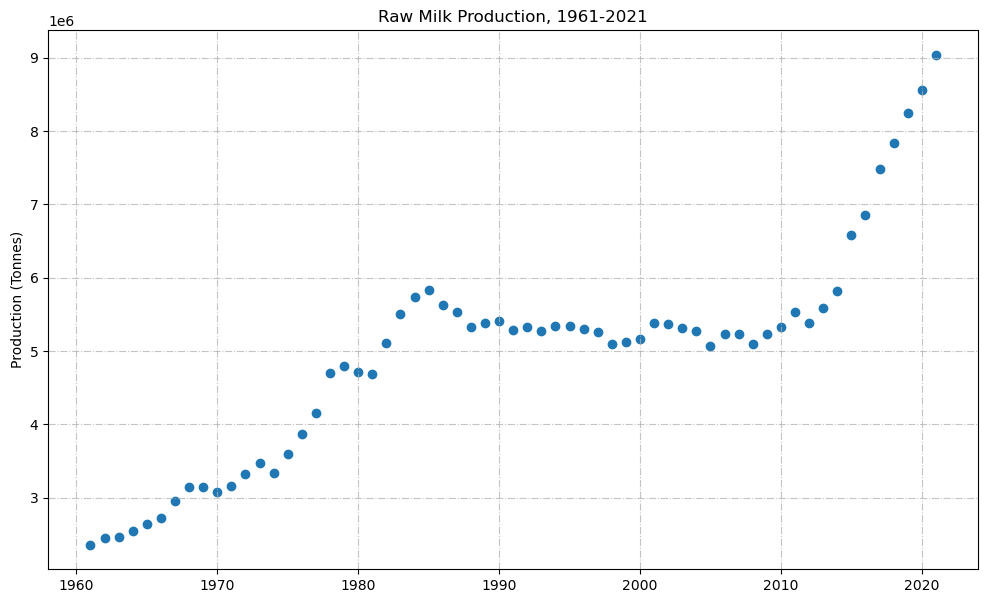

In [19]:
fig,ax=plt.subplots(figsize=(12,7))
ax.scatter(dfrawmilk.Year,dfrawmilk.Value)

#leg=ax.legend(loc='upper left')
ax.set_title(f'Raw Milk Production, 1961-2021')
ax.set_ylabel('Production (Tonnes)')
ax.grid(True,ls='-.', alpha=0.75)
#plt.savefig('rawmilkproduction.png')

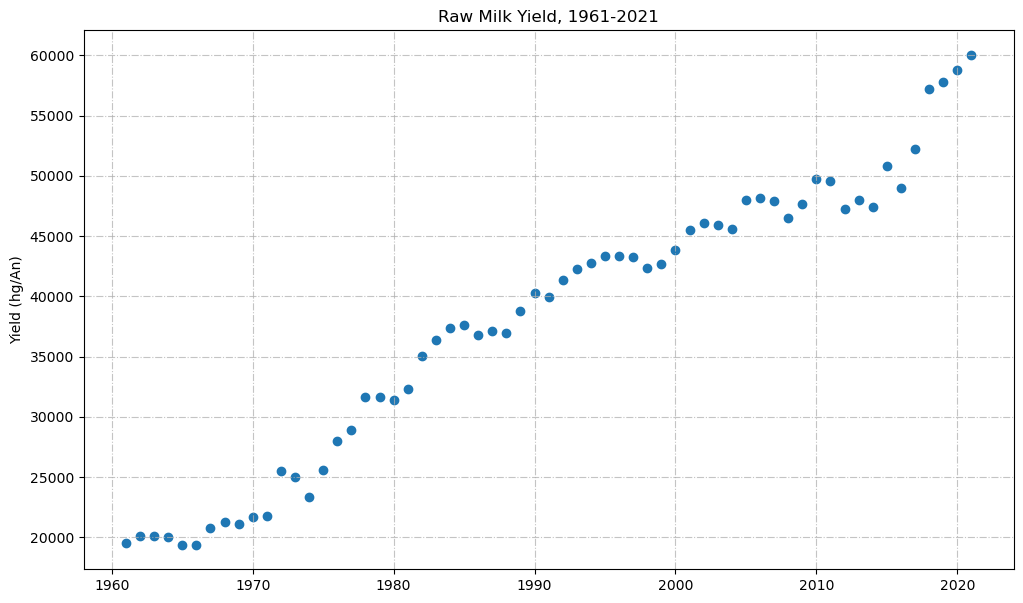

In [20]:
fig,ax=plt.subplots(figsize=(12,7))
#cols=['Value']
#for i in cols:
ax.scatter(dfyield.Year,dfyield.Value)

#leg=ax.legend(loc='upper left')
ax.set_title(f'Raw Milk Yield, 1961-2021')
ax.set_ylabel('Yield (hg/An)')
ax.grid(True,ls='-.', alpha=0.75)
#plt.savefig('rawmilkproduction.png')

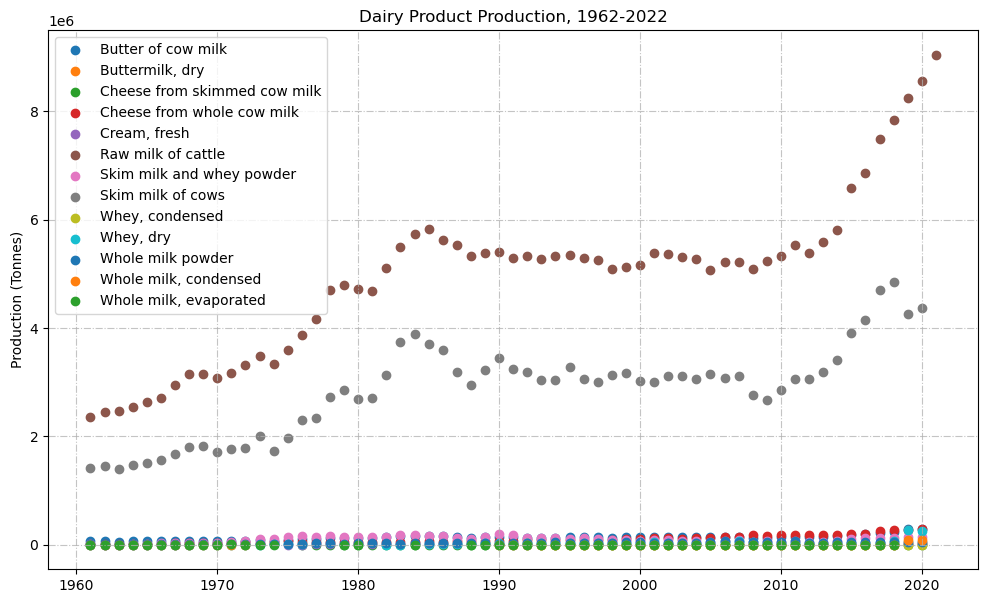

In [21]:

#plot data
fig,ax=plt.subplots(figsize=(12,7))
items=df['Item'].unique()

#loop through products and plot data
for i in items:
    dftemp=dfproduction[dfproduction.Item==i]
    ax.scatter(dftemp.Year,dftemp.Value,label=i)

leg=ax.legend(loc='upper left')
ax.set_title(f'Dairy Product Production, 1962-2022')
ax.set_ylabel('Production (Tonnes)')
ax.grid(True,ls='-.', alpha=0.75)
#plt.savefig('dairyproductproduction.png')

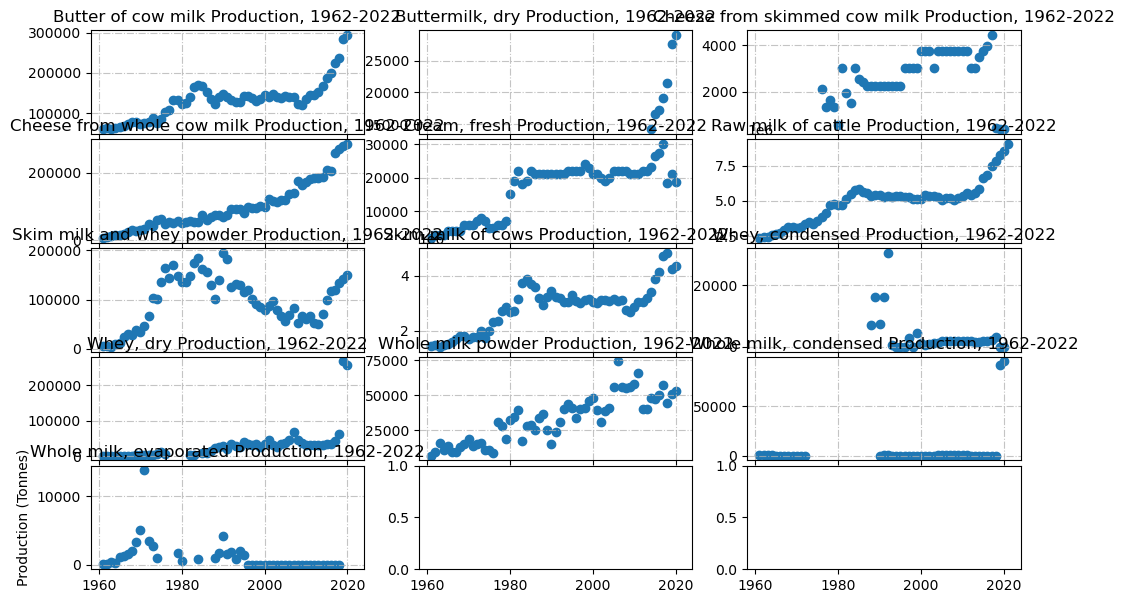

In [22]:
#plot data
items=df['Item'].unique()

# Calculate the number of rows and columns needed for the subplots
num_plots = len(items)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Create the figure and axis for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 7), sharex=True)

plt.subplots_adjust(hspace=.05)

# Make the axis indexable
axs = axs.flatten()

# Iterate over the items and create a subplot for each
for ax, item in zip(axs, items):
    # Filter the dataframe to only include the rows for the current item
    dftemp = dfproduction[dfproduction.Item == item]

    # Set the title of the plot
    ax.set_title(f'{item} Production, 1962-2022')

    # Set the y-axis label
    ax.set_ylabel('Production (Tonnes)')

    # Plot the production values
    ax.scatter(dftemp.Year, dftemp.Value)

    # Show the grid
    ax.grid(True, ls='-.', alpha=0.75)
    
for ax in axs[:-num_cols]:
    ax.set_xlabel("")

for ax in axs[:-num_cols]:
    ax.set_ylabel("")

data gaps are present in several of the inspected variables.Additionally it is to be noted that 

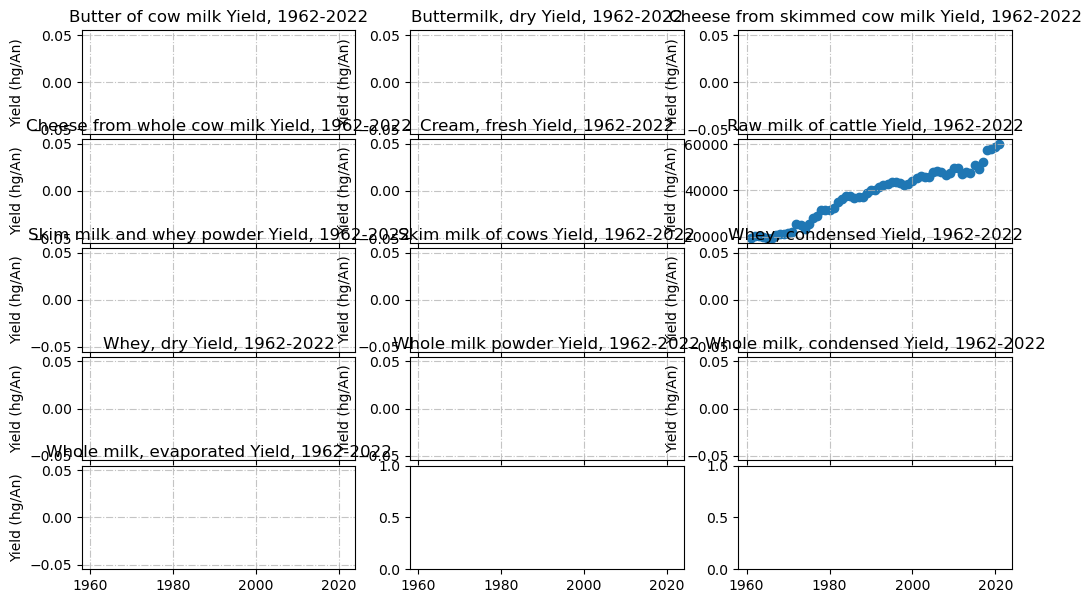

In [23]:
#plot data
items=df['Item'].unique()

# Calculate the number of rows and columns needed for the subplots
num_plots = len(items)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Create the figure and axis for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 7), sharex=True)

plt.subplots_adjust(hspace=.05)

# Make the axis indexable
axs = axs.flatten()

# Iterate over the items and create a subplot for each
for ax, item in zip(axs, items):
    # Filter the dataframe to only include the rows for the current item
    dftemp = dfyield[dfyield.Item == item]

    # Set the title of the plot
    ax.set_title(f'{item} Yield, 1962-2022')

    # Set the y-axis label
    ax.set_ylabel('Yield (hg/An)')

    # Plot the production values
    ax.scatter(dftemp.Year, dftemp.Value)

    # Show the grid
    ax.grid(True, ls='-.', alpha=0.75)
    
for ax in axs[:-num_cols]:
    ax.set_xlabel("")

In [24]:
#read in all other csv files and merge into one. then perform pair plot and heat map. do sentiment analysis too 

Handle all data relating to the selling price of cows milk from 1969-2022, sourced from CSO. 

In [267]:
#Read the two relevant data sets and manipulate together given that they are formatted the same way as seen below. 
df1=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Selling Price of Cows Milk 2000-2022 ALL COUNTRIES.csv")
df2=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Selling Price of Cows Milk 1969-2005 ALL COUNTRIES.csv")

#Inspect Datasets                
print('Shape of df containing selling price of cows milk 2000-2022',df1.shape)
print('Shape of df containing selling price of cows milk 1969-2005:',df2.shape)
display('Head of 00-22 dataframe: ', df1.head(10))
display('Head of 69-05 dataframe: ', df2.head(10))

Shape of df containing selling price of cows milk 2000-2022 (2043, 9)
Shape of df containing selling price of cows milk 1969-2005: (2619, 9)


'Head of 00-22 dataframe: '

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2000,27.83,NaN
1,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2001,31.90,NaN
2,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2002,30.14,NaN
3,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2003,28.18,NaN
4,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2004,27.89,NaN
5,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2005,27.95,NaN
6,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2006,28.54,NaN
7,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2007,32.25,NaN
8,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2008,37.51,NaN
9,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2009,27.69,NaN


'Head of 69-05 dataframe: '

,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1974,12.79,NaN
1,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1975,13.46,NaN
2,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1976,14.92,NaN
3,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1977,16.29,NaN
4,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1978,17.06,NaN
5,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1979,19.06,NaN
6,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1980,20.03,NaN
7,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1981,21.62,NaN
8,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1982,23.90,NaN
9,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1983,25.80,NaN


In [268]:
#breifly inspect dfs
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     2043 non-null   object 
 1   LAST UPDATE  2043 non-null   object 
 2   freq         2043 non-null   object 
 3   currency     2043 non-null   object 
 4   prod_ani     2043 non-null   int64  
 5   geo          2043 non-null   object 
 6   TIME_PERIOD  2043 non-null   int64  
 7   OBS_VALUE    1991 non-null   float64
 8   OBS_FLAG     62 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 143.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     2619 non-null   object 
 1   LAST UPDATE  2619 non-null   object 
 2   freq         2619 non-null   object 
 3   currency     2619 non-null   object 
 4   prod_apr     2619 non-null   int64  
 5   geo          2619 non-null   object 
 6   TIME_PERIOD  2619 non-null   int64  
 7   OBS_VALUE    2619 non-null   float64
 8   OBS_FLAG     0 non-null      float64
dtypes: float64(2), int64(2), object(5)
memory usage: 184.3+ KB


None

In [269]:
#Check columns before trimming any columns of no use to analysis
display(df1.describe(include='all'))
display(df2.describe(include='all'))


,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,2043,2043,2043,2043,2.043000e+03,2043,2043.000000,1991.000000,62
unique,1,1,1,2,NaN,29,NaN,NaN,3
top,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,NaN,DK,NaN,NaN,z
freq,2043,2043,2043,1022,NaN,130,NaN,NaN,36
mean,NaN,NaN,NaN,NaN,1.211174e+07,NaN,2010.562408,159.874485,NaN
std,NaN,NaN,NaN,NaN,6.500583e+02,NaN,6.228383,878.484225,NaN
min,NaN,NaN,NaN,NaN,1.211100e+07,NaN,2000.000000,8.720000,NaN
25%,NaN,NaN,NaN,NaN,1.211100e+07,NaN,2005.000000,29.010000,NaN
50%,NaN,NaN,NaN,NaN,1.211200e+07,NaN,2011.000000,33.310000,NaN
75%,NaN,NaN,NaN,NaN,1.211200e+07,NaN,2016.000000,42.530000,NaN


,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,2619,2619,2619,2619,2619.000000,2619,2619.000000,2619.000000,0.0
unique,1,1,1,2,NaN,28,NaN,NaN,NaN
top,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,NaN,LU,NaN,NaN,NaN
freq,2619,2619,2619,1345,NaN,198,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5234.951890,NaN,1989.838106,151.446056,NaN
std,NaN,NaN,NaN,NaN,95.910195,NaN,9.932379,1161.650599,NaN
min,NaN,NaN,NaN,NaN,5180.000000,NaN,1969.000000,0.060000,NaN
25%,NaN,NaN,NaN,NaN,5180.000000,NaN,1982.000000,20.280000,NaN
50%,NaN,NaN,NaN,NaN,5185.000000,NaN,1991.000000,28.630000,NaN
75%,NaN,NaN,NaN,NaN,5185.000000,NaN,1998.000000,37.510000,NaN


In [270]:
#Check columns before trimming any columns of no use to analysis
display(df1.describe(include='all'))
display(df2.describe(include='all'))


,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,2043,2043,2043,2043,2.043000e+03,2043,2043.000000,1991.000000,62
unique,1,1,1,2,NaN,29,NaN,NaN,3
top,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,NaN,DK,NaN,NaN,z
freq,2043,2043,2043,1022,NaN,130,NaN,NaN,36
mean,NaN,NaN,NaN,NaN,1.211174e+07,NaN,2010.562408,159.874485,NaN
std,NaN,NaN,NaN,NaN,6.500583e+02,NaN,6.228383,878.484225,NaN
min,NaN,NaN,NaN,NaN,1.211100e+07,NaN,2000.000000,8.720000,NaN
25%,NaN,NaN,NaN,NaN,1.211100e+07,NaN,2005.000000,29.010000,NaN
50%,NaN,NaN,NaN,NaN,1.211200e+07,NaN,2011.000000,33.310000,NaN
75%,NaN,NaN,NaN,NaN,1.211200e+07,NaN,2016.000000,42.530000,NaN


,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
count,2619,2619,2619,2619,2619.000000,2619,2619.000000,2619.000000,0.0
unique,1,1,1,2,NaN,28,NaN,NaN,NaN
top,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,NaN,LU,NaN,NaN,NaN
freq,2619,2619,2619,1345,NaN,198,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5234.951890,NaN,1989.838106,151.446056,NaN
std,NaN,NaN,NaN,NaN,95.910195,NaN,9.932379,1161.650599,NaN
min,NaN,NaN,NaN,NaN,5180.000000,NaN,1969.000000,0.060000,NaN
25%,NaN,NaN,NaN,NaN,5180.000000,NaN,1982.000000,20.280000,NaN
50%,NaN,NaN,NaN,NaN,5185.000000,NaN,1991.000000,28.630000,NaN
75%,NaN,NaN,NaN,NaN,5185.000000,NaN,1998.000000,37.510000,NaN


In [271]:
#Make sure that all data in both datasets is recorded in euro.
dftemp=df1[df1.currency== 'NAC']
dftemp1=df2[df2.currency== 'NAC']
display(dftemp)
display(dftemp1)

#create country list for later. Update when country list is cut down.
countries=df1['geo'].unique()
print(countries)

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
1021,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2000,27.83,NaN
1022,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2001,31.90,NaN
1023,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2002,30.14,NaN
1024,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2003,28.18,NaN
1025,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12111000,AT,2004,27.89,NaN
...,...,...,...,...,...,...,...,...,...
2038,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2019,285.00,NaN
2039,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2020,292.00,NaN
2040,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2021,287.00,NaN
2041,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,SI,2014,NaN,z


,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
1274,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1973,18.39,NaN
1275,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1974,20.35,NaN
1276,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1975,21.08,NaN
1277,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1976,21.73,NaN
1278,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5180,AT,1977,22.31,NaN
...,...,...,...,...,...,...,...,...,...
2614,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1989,22.51,NaN
2615,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1990,23.59,NaN
2616,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1991,24.75,NaN
2617,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,NAC,5411,UK,1992,24.75,NaN


['AT' 'BE' 'BG' 'CZ' 'DE' 'DK' 'EL' 'ES' 'FI' 'FR' 'HR' 'IE' 'LT' 'LU'
 'LV' 'NL' 'PT' 'RO' 'SE' 'SI' 'UK' 'EE' 'HU' 'IT' 'MT' 'PL' 'SK' 'CY'
 'XK']


Delete all rows containing 'NAC' in the currency col. This is duplicate data but all OBS_VALUEs are
converted to local currency. We will operate in euro to avoid having to perform currency conversion. 

In [272]:
#Delete all rows containing 'NAC' in the currency col. This is duplicate data but all OBS_VALUEs are
#converted to local currency. We will operate in euro to avoid having to perform currency conversion. 
#df1=df1[df1.currency!='NAC'] 
#df2=df2[df2.currency!='NAC']

In [279]:
#create function designed to handle CSO data. 
def cso_format(dataframe,vals_to_keep):
    
    #filter df to only keep rows with specified country values
    dataframe=dataframe[dataframe.iloc[:,5].isin(vals_to_keep)]
    print(dataframe.shape)
    print(dataframe.columns)

    #Drop rows containing NAC in currency column. 
    dataframe=dataframe[dataframe.currency!='NAC']
    print(dataframe.shape)
    print(dataframe.columns)
    
    return dataframe

In [281]:
#define formatting lists prior to cleaning of datasets using function
drop_cols=['DATAFLOW','LAST UPDATE','freq','currency','OBS_FLAG']
countries=('DE','NL','ES','IE','FR','IT','PL')

#use function to format two datasets prior to concating.

print(cso_format(df1,countries))

#Drop specified columns
df1=df1.drop(columns=drop_cols)
df1.shape

#print(cso_format(df2,drop_cols,countries))
#df2=df2

(534, 9)
Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'currency', 'prod_ani', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')
(267, 9)
Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'currency', 'prod_ani', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')
                      DATAFLOW        LAST UPDATE freq currency  prod_ani geo  \
88   ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:00    A      EUR  12111000  DE   
89   ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:00    A      EUR  12111000  DE   
90   ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:00    A      EUR  12111000  DE   
91   ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:00    A      EUR  12111000  DE   
92   ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:00    A      EUR  12111000  DE   
..                         ...                ...  ...      ...       ...  ..   
986  ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:00    A      EUR  12113000  IE   
987  ESTAT:APRI_AP_ANOUTA(1.0)  27/11/22 23:00:0

(2043, 4)

(0, 0)

In [246]:
#Remove any more unecessary data. We will focus on the top 7 milk producers in the EU. 
#df1=df1.loc[((df1['geo']=='DE') | (df1['geo']=='NL')| (df1['geo']=='IT') | (df1['geo']=='FR') | (df1['geo']=='PL')| (df1['geo']=='IE')| (df1['geo']=='ES'))]
#df2=df2.loc[((df2['geo']=='DE') | (df2['geo']=='NL')| (df2['geo']=='IT') | (df2['geo']=='FR') | (df2['geo']=='PL')| (df2['geo']=='IE')| (df2['geo']=='ES'))]

#sanity check- make sure correct countries are removed from dataset
df50['geo'].unique()
df2['geo'].unique()          

#remove unecessary columns. 

KeyError: 'geo'

In [215]:
df1

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2000,27.83,NaN
1,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2001,31.90,NaN
2,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2002,30.14,NaN
3,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2003,28.18,NaN
4,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2004,27.89,NaN
...,...,...,...,...,...,...,...,...,...
2038,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2019,285.00,NaN
2039,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2020,292.00,NaN
2040,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,RO,2021,287.00,NaN
2041,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,NAC,12113000,SI,2014,NaN,z


In [162]:
#concat dataframes
frames=[df1,df2]
newdf=pd.concat(frames)
newdf.shape

(4662, 10)

In [135]:
#format dataset
df1.iloc[[0],[0]]='Year'
df1.iloc[[0],[1]]='Selling Price of Raw cows milk (eur/100kg)'
df1.columns=df1.iloc[0]
df1

,Year,Selling Price of Raw cows milk (eur/100kg)
0,Year,Selling Price of Raw cows milk (eur/100kg)
1,2010,28.15
3,2011.0,33.55
5,2012.0,30.83
7,2013.0,37.76
9,2014.0,36.42
11,2015.0,28.64
13,2016.0,27.25
15,2017.0,36.31
17,2018.0,33.87


Read in additional dataset sourced from CSO containing selling prices of whole (5411), raw w/actual fat content (5185) and raw w/ 3.7% fat content (5180) milk. This data will be appended with the previously read data

In [136]:
df2=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Selling Price of Cows Milk 1969-2005 ALL COUNTRIES.csv")
#Inspect Dataset
print(df2.shape)
display(df2.head(10))

(2619, 9)


,DATAFLOW,LAST UPDATE,freq,currency,prod_apr,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1974,12.79,NaN
1,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1975,13.46,NaN
2,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1976,14.92,NaN
3,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1977,16.29,NaN
4,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1978,17.06,NaN
5,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1979,19.06,NaN
6,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1980,20.03,NaN
7,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1981,21.62,NaN
8,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1982,23.90,NaN
9,ESTAT:APRI_AP_HAOUTA(1.0),27/03/09 11:00:00,A,EUR,5180,AT,1983,25.80,NaN


In [138]:
df3=pd.read_csv("/Users/markc/Documents/Data Analytics Masters/CA2/Data/Dairy Data/X ESTAT Selling Price of Cows Milk 2000-2022 ALL COUNTRIES.csv")
#Inspect Dataset
print(df3.shape)
display(df3.head(10))

(2043, 9)


,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2000,27.83,NaN
1,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2001,31.90,NaN
2,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2002,30.14,NaN
3,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2003,28.18,NaN
4,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2004,27.89,NaN
5,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2005,27.95,NaN
6,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2006,28.54,NaN
7,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2007,32.25,NaN
8,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2008,37.51,NaN
9,ESTAT:APRI_AP_ANOUTA(1.0),27/11/22 23:00:00,A,EUR,12111000,AT,2009,27.69,NaN


## Sentiment Analysis

## Dairy Analysis (General and country-specific)

Sentiment analysis is to be performed using a twitter API to create a database of related tweets, and textblob to classify the sentiment of each tweet.

Perform sentiment analysis for dairy milk

#Create client using bearer token.
client=tweepy.Client("AAAAAAAAAAAAAAAAAAAAAKs8lAEAAAAAorbMQOKSsK16dl8bJVElcSGafYY%3DUUjUq6aLoFu8dHNl1tBeuwWBDBtgTbEwVwwrQ4zE9zzxKQyz99")

#define search terms to best capture the perception of the dairy industry.
query="dairy OR cow milk -is:retweet"
max_results=100
limit=1000

#capture tweets in dictionaries and create dataframe for later analysis.    
twitter_dairy_data=[]

for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,max_results=max_results,tweet_fields=['text']
                             ).flatten(limit=limit):
    text = tweet["text"]
    sentiment = TextBlob(text).sentiment.polarity      #textblob calculates the sentiment of each tweet  and produces a value 
                                                       # between -1 (very negative) and +1 (very positive). 
    tweet_dict={"text":text, "sentiment":sentiment}
    twitter_dairy_data.append(tweet_dict)
    
twitter_dairy_df = pd.DataFrame(twitter_dairy_data)
twitter_dairy_df.shape

In [29]:
twitter_dairy_df.describe()

NameError: name 'twitter_dairy_df' is not defined

Perform sentiment analysis for dairy alternatives

One must consider the query terms and how they may be relating to subjects other than the one at hand. For example, a new album called 'oat' (for whatever reason it would be called this) could be trending and therefore tweets relating to the album's success or failure would be captured by our search, rather than tweets about dairy alternatives. Therefore our sentiment analysis would be skewed. 

#Create client using bearer token.
client=tweepy.Client("AAAAAAAAAAAAAAAAAAAAAKs8lAEAAAAAorbMQOKSsK16dl8bJVElcSGafYY%3DUUjUq6aLoFu8dHNl1tBeuwWBDBtgTbEwVwwrQ4zE9zzxKQyz99")

#define search terms to best capture the perception of the dairy industry.
query="oat OR almond OR soy milk OR dairy alternative  -is:retweet"
max_results=100
limit=1000

#capture tweets in dictionaries and create dataframe for later analysis.    
twitter_alternative_data=[]

for tweet in tweepy.Paginator(client.search_recent_tweets,query=query,max_results=max_results,tweet_fields=['text']
                             ).flatten(limit=limit):
    text = tweet["text"]
    sentiment = TextBlob(text).sentiment.polarity      #textblob calculates the sentiment of each tweet  and produces a value 
                                                       # between -1 (very negative) and +1 (very positive). 
    tweet_dict={"text":text, "sentiment":sentiment}
    twitter_alternative_data.append(tweet_dict)
    
twitter_alternative_df = pd.DataFrame(twitter_alternative_data)
twitter_alternative_df.shape

In [ ]:
twitter_alternative_df.describe()

In [ ]:
plt.

## Shelved Code 

In [ ]:
""""import json
import requests
from textblob import TextBlob

# Provide Essential Twitter API credentials
api_key = "96LroqpGgtzIwmO3gPmhVB7gg"
api_secret = "maMiygsg88RhyTdy5BiI8XoUXNpSlGOHXyPN3AsK0hkrlj7yk1"

# Authenticate with the Essential Twitter API
auth_response = requests.post(
    "https://api.twitter.com/oauth2/token",
    headers={
        "Content-Type": "application/x-www-form-urlencoded;charset=UTF-8",
        "Authorization": f"Basic {api_key}:{api_secret}"
    },
    data={
        "grant_type": "client_credentials"
    }
)

# Get the access token from the auth response
access_token = auth_response.json()["access_token"]

# Set up the HTTP headers for the Essential Twitter API request
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Define the search term and the number of tweets to retrieve
search_term = "Dairy"
tweet_amount = 200

# Make a GET request to the Essential Twitter API to search for tweets
response = requests.get(
    "https://api.twitter.com/2/tweets/search/recent",
    headers=headers,
    params={
        "query": search_term,
        "max_results": tweet_amount,
        "expansions": "author_id",
        "user.fields": "username"
    }
)

# Get the list of tweets from the API response
tweets = response.json()["data"]

# Iterate through the list of tweets
for tweet in tweets:
    text = tweet["text"]
    sentiment = TextBlob(text).sentiment.polarity
    print(f'Tweet: {text}\nSentiment: {sentiment}')""";

In [ ]:
"""""client=tweepy.Client("AAAAAAAAAAAAAAAAAAAAAKs8lAEAAAAAorbMQOKSsK16dl8bJVElcSGafYY%3DUUjUq6aLoFu8dHNl1tBeuwWBDBtgTbEwVwwrQ4zE9zzxKQyz99")

#define search terms
query="dairy -is:retweet"
num_tweets=100

#create a request to the API to search for tweets
response=client.search_recent_tweets(query=query, max_results=num_tweets,tweet_fields=['text'])

#capture tweets in dictionaries and create dataframe for later analysis.    
twitter_data=[]

for tweet in response.data:
    text = tweet["text"]
    sentiment = TextBlob(text).sentiment.polarity
    #print(f'Tweet: {text}\nSentiment: {sentiment}')
    tweet_dict={"text":text, "sentiment":sentiment}
    twitter_data.append(tweet_dict)
    
twitter_df = pd.DataFrame(twitter_data)
twitter_df.head() """;